<a href="https://colab.research.google.com/github/AbelJames26/Project_Mining/blob/main/Final_draft_copy181122REV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sqlite3
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#Tuning imports
!pip install -U keras-tuner
import kerastuner as kt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * 
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.9.2


**Import Data Set**

In [ ]:
Path = "/content/17112022_Project_Data.csv"
df = pd.read_csv(Path)
df.shape

(904, 14)

Visualize dataset

In [ ]:
#Displaying the data
df.head()

,COMMODITY,LATITUDE,LONGITUDE,SITE,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,DATE,GOLD_PRICE_USD,MINERAL_LAND_VALUE_USD,COMM_CODE
0,Gold,-20.771948,122.201825,Anketell Shelf,108.1,0.711064,76866.00,23.0,0.44,76866.00,1/10/2022,1662.4,38235.2,1
1,Gold,-21.727803,122.640676,Anketell Shelf,92.0,0.235652,216.80,25.0,0.44,326.80,8/10/2022,1700.5,42512.5,1
2,Gold,-21.727803,122.640676,Anketell Shelf,92.0,1.857609,170900.00,25.0,3.00,245900.00,8/10/2022,1700.5,42512.5,1
3,Gold,-20.771948,122.201825,Anketell Shelf,108.1,0.147234,159.16,21.0,0.44,159.16,9/10/2022,1700.5,35710.5,1
4,Gold,-20.771948,122.201825,Anketell Shelf,108.1,0.538936,58259.00,25.0,3.00,58259.00,22/10/2022,1651.0,41275.0,1


Visualize Ore reserve locations 

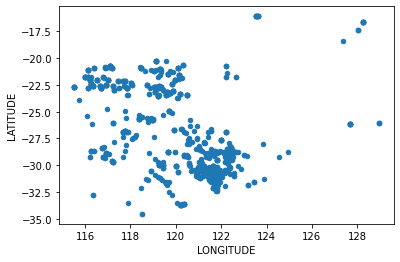

In [ ]:
df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE")

**Check for Missing Data**

In [ ]:
# Checking the null values

df.isna().any()

COMMODITY                 False
LATITUDE                  False
LONGITUDE                 False
SITE                      False
RES_QTY_MILLION_TONNES    False
RES_QTY_GRAM_TONNE        False
RES_CON_KILOGRAM          False
RV_QTY_million_tonnes     False
RV_QTY_G_GRAM_TONNE       False
POINT_SIZE_KILOGRAM       False
DATE                      False
GOLD_PRICE_USD            False
MINERAL_LAND_VALUE_USD    False
COMM_CODE                 False
dtype: bool

Count the number of Null Values in Each Column

In [ ]:
# Count number of null values in each columns

df.isna().sum()

COMMODITY                 0
LATITUDE                  0
LONGITUDE                 0
SITE                      0
RES_QTY_MILLION_TONNES    0
RES_QTY_GRAM_TONNE        0
RES_CON_KILOGRAM          0
RV_QTY_million_tonnes     0
RV_QTY_G_GRAM_TONNE       0
POINT_SIZE_KILOGRAM       0
DATE                      0
GOLD_PRICE_USD            0
MINERAL_LAND_VALUE_USD    0
COMM_CODE                 0
dtype: int64

Drop NA Values if count is less than 5%

In [ ]:
# We can drop the null value as their count is less than 5%

df.dropna(inplace=True)

**Shuffle data**

In [ ]:
df = df.sample(n=len(df),random_state =1)
df

,COMMODITY,LATITUDE,LONGITUDE,SITE,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,DATE,GOLD_PRICE_USD,MINERAL_LAND_VALUE_USD,COMM_CODE
874,Nickel,-26.107107,127.696907,Musgrave Province,389.100000,0.011643,45304.000000,253.000000,0.012391,76654.000000,30/10/2022,1641.8,4.153754e+05,3
884,Nickel,-26.039626,128.939310,Warakurna Large Igneous Province,215.837898,44.284417,95582.555410,168.422406,45.640000,172450.541500,30/10/2022,1641.8,2.765159e+05,3
878,Nickel,-26.107107,127.696907,Musgrave Province,545.100000,0.066735,36377.000000,253.000000,0.100000,61677.000000,30/10/2022,1641.8,4.153754e+05,3
784,Nickel,-29.173211,122.253947,Eastern Goldfields Superterrane,4.650000,18.500000,0.860250,7.490000,1.881497,0.860250,18/10/2022,1649.0,1.235101e+04,3
525,Iron,-21.766987,116.777930,Hamersley Basin,84.300000,57.188250,48.209695,1294.000000,2.988779,48.209695,9/10/2022,1700.5,2.200447e+06,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Iron,-30.044223,120.007463,Youanmi Terrane,1445.760000,29.301637,423.631350,236.600000,28.193153,490.336350,13/10/2022,1670.0,3.951220e+05,2
767,Nickel,-29.053396,122.151539,Eastern Goldfields Superterrane,10.500000,0.988000,103.740000,6.900000,1.537423,103.740000,9/10/2022,1700.5,1.173345e+04,3
72,Gold,-29.153011,121.675721,Eastern Goldfields Superterrane,76.230000,0.597740,45565.700000,30.000000,1.798119,45565.700000,8/10/2022,1700.5,5.101500e+04,1
235,Gold,-30.566178,121.112010,Yilgarn Craton,0.330000,1.054545,348.000000,30.700000,6.133579,348.000000,8/10/2022,1700.5,5.220535e+04,1


**Convert Categorical variable to numeric. For Gold, Iron Nickel. Into three columns. 1 if it is that commodity or 0 if it isn't**

In [ ]:
df1 = pd.get_dummies(df['COMMODITY'])
 
# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
df = pd.concat([df, df1], axis=1).reindex(df.index)
 
# removing the column 'Purchased' from df
# as it is of no use now.
df.drop('COMMODITY', axis=1, inplace=True)
 
# printing df
df

,LATITUDE,LONGITUDE,SITE,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,DATE,GOLD_PRICE_USD,MINERAL_LAND_VALUE_USD,COMM_CODE,Gold,Iron,Nickel
874,-26.107107,127.696907,Musgrave Province,389.100000,0.011643,45304.000000,253.000000,0.012391,76654.000000,30/10/2022,1641.8,4.153754e+05,3,0,0,1
884,-26.039626,128.939310,Warakurna Large Igneous Province,215.837898,44.284417,95582.555410,168.422406,45.640000,172450.541500,30/10/2022,1641.8,2.765159e+05,3,0,0,1
878,-26.107107,127.696907,Musgrave Province,545.100000,0.066735,36377.000000,253.000000,0.100000,61677.000000,30/10/2022,1641.8,4.153754e+05,3,0,0,1
784,-29.173211,122.253947,Eastern Goldfields Superterrane,4.650000,18.500000,0.860250,7.490000,1.881497,0.860250,18/10/2022,1649.0,1.235101e+04,3,0,0,1
525,-21.766987,116.777930,Hamersley Basin,84.300000,57.188250,48.209695,1294.000000,2.988779,48.209695,9/10/2022,1700.5,2.200447e+06,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-30.044223,120.007463,Youanmi Terrane,1445.760000,29.301637,423.631350,236.600000,28.193153,490.336350,13/10/2022,1670.0,3.951220e+05,2,0,1,0
767,-29.053396,122.151539,Eastern Goldfields Superterrane,10.500000,0.988000,103.740000,6.900000,1.537423,103.740000,9/10/2022,1700.5,1.173345e+04,3,0,0,1
72,-29.153011,121.675721,Eastern Goldfields Superterrane,76.230000,0.597740,45565.700000,30.000000,1.798119,45565.700000,8/10/2022,1700.5,5.101500e+04,1,1,0,0
235,-30.566178,121.112010,Yilgarn Craton,0.330000,1.054545,348.000000,30.700000,6.133579,348.000000,8/10/2022,1700.5,5.220535e+04,1,1,0,0


**Remove variables not used for prediction**

In [ ]:
df.drop('SITE', axis=1, inplace=True) 
df.drop('DATE', axis=1, inplace=True) 
df.drop('COMM_CODE', axis=1, inplace=True) 

In [ ]:
df

,LATITUDE,LONGITUDE,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,GOLD_PRICE_USD,MINERAL_LAND_VALUE_USD,Gold,Iron,Nickel
874,-26.107107,127.696907,389.100000,0.011643,45304.000000,253.000000,0.012391,76654.000000,1641.8,4.153754e+05,0,0,1
884,-26.039626,128.939310,215.837898,44.284417,95582.555410,168.422406,45.640000,172450.541500,1641.8,2.765159e+05,0,0,1
878,-26.107107,127.696907,545.100000,0.066735,36377.000000,253.000000,0.100000,61677.000000,1641.8,4.153754e+05,0,0,1
784,-29.173211,122.253947,4.650000,18.500000,0.860250,7.490000,1.881497,0.860250,1649.0,1.235101e+04,0,0,1
525,-21.766987,116.777930,84.300000,57.188250,48.209695,1294.000000,2.988779,48.209695,1700.5,2.200447e+06,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-30.044223,120.007463,1445.760000,29.301637,423.631350,236.600000,28.193153,490.336350,1670.0,3.951220e+05,0,1,0
767,-29.053396,122.151539,10.500000,0.988000,103.740000,6.900000,1.537423,103.740000,1700.5,1.173345e+04,0,0,1
72,-29.153011,121.675721,76.230000,0.597740,45565.700000,30.000000,1.798119,45565.700000,1700.5,5.101500e+04,1,0,0
235,-30.566178,121.112010,0.330000,1.054545,348.000000,30.700000,6.133579,348.000000,1700.5,5.220535e+04,1,0,0


In [ ]:
df = df[['LATITUDE',	'LONGITUDE',	'RES_QTY_MILLION_TONNES',	'RES_QTY_GRAM_TONNE',	'RES_CON_KILOGRAM',
         'RV_QTY_million_tonnes',	'RV_QTY_G_GRAM_TONNE',	'POINT_SIZE_KILOGRAM',
         'GOLD_PRICE_USD','Gold','Iron','Nickel','MINERAL_LAND_VALUE_USD']]

df

,LATITUDE,LONGITUDE,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,GOLD_PRICE_USD,Gold,Iron,Nickel,MINERAL_LAND_VALUE_USD
874,-26.107107,127.696907,389.100000,0.011643,45304.000000,253.000000,0.012391,76654.000000,1641.8,0,0,1,4.153754e+05
884,-26.039626,128.939310,215.837898,44.284417,95582.555410,168.422406,45.640000,172450.541500,1641.8,0,0,1,2.765159e+05
878,-26.107107,127.696907,545.100000,0.066735,36377.000000,253.000000,0.100000,61677.000000,1641.8,0,0,1,4.153754e+05
784,-29.173211,122.253947,4.650000,18.500000,0.860250,7.490000,1.881497,0.860250,1649.0,0,0,1,1.235101e+04
525,-21.766987,116.777930,84.300000,57.188250,48.209695,1294.000000,2.988779,48.209695,1700.5,0,1,0,2.200447e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-30.044223,120.007463,1445.760000,29.301637,423.631350,236.600000,28.193153,490.336350,1670.0,0,1,0,3.951220e+05
767,-29.053396,122.151539,10.500000,0.988000,103.740000,6.900000,1.537423,103.740000,1700.5,0,0,1,1.173345e+04
72,-29.153011,121.675721,76.230000,0.597740,45565.700000,30.000000,1.798119,45565.700000,1700.5,1,0,0,5.101500e+04
235,-30.566178,121.112010,0.330000,1.054545,348.000000,30.700000,6.133579,348.000000,1700.5,1,0,0,5.220535e+04


Create Train, Test and Validation sets

In [ ]:
X = df.drop(columns='MINERAL_LAND_VALUE_USD')
X.head() # Creating Features for input

,LATITUDE,LONGITUDE,RES_QTY_MILLION_TONNES,RES_QTY_GRAM_TONNE,RES_CON_KILOGRAM,RV_QTY_million_tonnes,RV_QTY_G_GRAM_TONNE,POINT_SIZE_KILOGRAM,GOLD_PRICE_USD,Gold,Iron,Nickel
874,-26.107107,127.696907,389.100000,0.011643,45304.000000,253.000000,0.012391,76654.000000,1641.8,0,0,1
884,-26.039626,128.939310,215.837898,44.284417,95582.555410,168.422406,45.640000,172450.541500,1641.8,0,0,1
878,-26.107107,127.696907,545.100000,0.066735,36377.000000,253.000000,0.100000,61677.000000,1641.8,0,0,1
784,-29.173211,122.253947,4.650000,18.500000,0.860250,7.490000,1.881497,0.860250,1649.0,0,0,1
525,-21.766987,116.777930,84.300000,57.188250,48.209695,1294.000000,2.988779,48.209695,1700.5,0,1,0


In [ ]:
Y = df[['MINERAL_LAND_VALUE_USD']] # This is our predicting feature 
Y.head()

,MINERAL_LAND_VALUE_USD
874,4.153754e+05
884,2.765159e+05
878,4.153754e+05
784,1.235101e+04
525,2.200447e+06


In [ ]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))


X_train shape: (542, 12)
y_train shape: (542, 1)
X_test shape: (181, 12)
y_test shape: (181, 1)
X_val shape: (181, 12)
y val shape: (181, 1)


**Data Standardization by using StandardScaler function**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df.iloc[:, :9])

def preprocessor(X):
  A = np.copy(X)
  A[:, :9] = scaler.transform(A[:, :9])
  return A


X_train, X_val,X_test = preprocessor(X_train), preprocessor(X_val),preprocessor(X_test)






/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
X_train.shape,X_test.shape,X_val.shape

((542, 12), (181, 12), (181, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81a6df2950>,
      dtype=object)

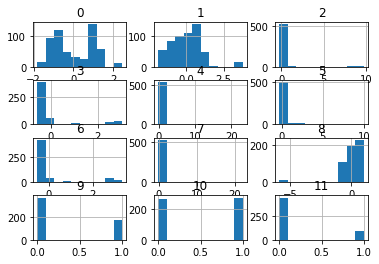

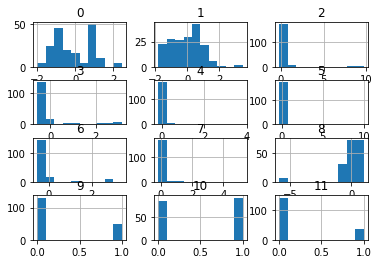

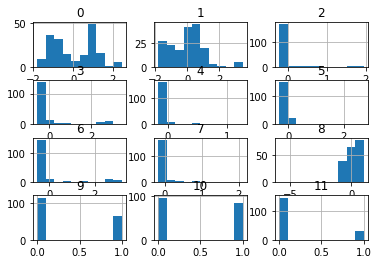

In [ ]:
pd.DataFrame(X_train).hist()
pd.DataFrame(X_test).hist()
pd.DataFrame(X_val).hist()

**Linear Regresssion** 


In [ ]:
from sklearn.metrics import mean_squared_error as mse 
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)                                                   # Trying to observe the training and validation error for linear regresssion  
mse(lm.predict(X_train), (y_train), squared = False) ,mse(lm.predict(X_val), (y_val), squared = False) # By observing the results, there is chances we are slightly underfitting as the training loss is lower than validation loss

(10194.391301836056, 6128.63394246127)

**KK Neighbours model** 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)           #Noted that when the n_neighbor number was increased the errors for both increased dramatically. Hence 3 was the best.
mse(knn.predict(X_train), (y_train), squared = False) ,mse(knn.predict(X_val), (y_val), squared = False)

(146432.0018282124, 104887.76047565517)

**Random Forest model** 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth = 13).fit(X_train, y_train)  # Noted that as the depth layer went up, the model increasing started underfitting although validation loss was decreasing. Based on manual trial and error the best depth number was 13 
mse(rfr.predict(X_train), (y_train), squared = False) ,mse(rfr.predict(X_val), (y_val), squared = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


(12280.370199763514, 10007.47416097357)

Gradient boosting model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


gbr = GradientBoostingRegressor(n_estimators= 52).fit(X_train, y_train)  # Noted that arond 50 is when train and val loss are similar and low. So less signs of over/underfitting. Leave at 52. Best so far
mse(gbr.predict(X_train), (y_train), squared = False) ,mse(gbr.predict(X_val), (y_val), squared = False)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(5352.316927620679, 6119.357213054674)

DNN libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * 
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

Simple Neural Network

In [ ]:
#from sklearn.utils import optimize
#simple_nn = Sequential()
#simple_nn.add(InputLayer((12,)))
#simple_nn.add(Dense(2, 'relu'))
#simple_nn.add(Dense(1, 'linear'))

#opt = Adam(learning_rate = 0.10)
#cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
#simple_nn.compile(optimizer = opt, loss = 'mse', metrics = [RootMeanSquaredError()])

#simple_nn.fit(x = X_train, y=y_train, validation_data = (X_val, y_val), callbacks=[cp], epochs = 100)

Epoch 1/100
17/17 [==============================] - 1s 43ms/step - loss: 693271920640.0000 - root_mean_squared_error: 832629.5000 - val_loss: 96299728896.0000 - val_root_mean_squared_error: 310321.9688
Epoch 2/100
17/17 [==============================] - 1s 42ms/step - loss: 693259337728.0000 - root_mean_squared_error: 832621.9375 - val_loss: 96291897344.0000 - val_root_mean_squared_error: 310309.3438
Epoch 3/100
17/17 [==============================] - 1s 33ms/step - loss: 693212479488.0000 - root_mean_squared_error: 832593.8125 - val_loss: 96276553728.0000 - val_root_mean_squared_error: 310284.6250
Epoch 4/100
17/17 [==============================] - 1s 33ms/step - loss: 693132853248.0000 - root_mean_squared_error: 832546.0000 - val_loss: 96250445824.0000 - val_root_mean_squared_error: 310242.5625
Epoch 5/100
17/17 [==============================] - 1s 46ms/step - loss: 692998569984.0000 - root_mean_squared_error: 832465.3750 - val_loss: 96210649088.0000 - val_root_mean_squared_erro

Evaluate Simple model

In [ ]:
#from tensorflow.keras.models import load_model
#simple_nn = load_model('models/simple_nn')
#mse(simple_nn.predict(X_train), y_train, squared = False), mse(simple_nn.predict(X_val),y_val,squared = False)

6/6 [==============================] - 0s 2ms/step


(671407.0591292151, 256834.67017091336)

Create Medium DNN Model 

In [ ]:
#from sklearn.utils import optimize
#medium_nn = Sequential()
#medium_nn.add(InputLayer((12,)))
#medium_nn.add(Dense(32, 'relu'))
#medium_nn.add(Dense(16, 'relu'))
#medium_nn.add(Dense(1, 'linear'))

#opt = Adam(learning_rate = 0.10)
#cp = ModelCheckpoint('models/medium_nn', save_best_only=True)
#medium_nn.compile(optimizer = opt, loss = 'mse', metrics = [RootMeanSquaredError()])

#medium_nn.fit(x = X_train, y=y_train, validation_data = (X_val, y_val), callbacks=[cp], epochs = 100)







Epoch 1/100
17/17 [==============================] - 1s 49ms/step - loss: 692242677760.0000 - root_mean_squared_error: 832011.2500 - val_loss: 95461179392.0000 - val_root_mean_squared_error: 308967.9375
Epoch 2/100
17/17 [==============================] - 1s 41ms/step - loss: 673968947200.0000 - root_mean_squared_error: 820956.1250 - val_loss: 87310737408.0000 - val_root_mean_squared_error: 295483.9062
Epoch 3/100
17/17 [==============================] - 1s 42ms/step - loss: 604454846464.0000 - root_mean_squared_error: 777466.9375 - val_loss: 69403631616.0000 - val_root_mean_squared_error: 263445.6875
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 444692758528.0000 - root_mean_squared_error: 666852.8750 - val_loss: 78267105280.0000 - val_root_mean_squared_error: 279762.5938
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 306815860736.0000 - root_mean_squared_error: 553909.6250 - val_loss: 118321291264.0000 - val_root_mean_squared_error

Evaluate Medium model

In [ ]:
#from tensorflow.keras.models import load_model
#medium_nn = load_model('models/medium_nn')
#mse(medium_nn.predict(X_train), y_train, squared = False), mse(medium_nn.predict(X_val),y_val,squared = False)

6/6 [==============================] - 0s 2ms/step


(9002.712128712541, 5112.4895708462955)

Large Neural Network

In [ ]:
#from sklearn.utils import optimize
#large_nn = Sequential()
#large_nn.add(InputLayer((12,)))
#large_nn.add(Dense(256, 'relu'))
#large_nn.add(Dense(128, 'relu'))
#large_nn.add(Dense(64, 'relu'))
#large_nn.add(Dense(32, 'relu'))
#large_nn.add(Dense(1, 'linear'))

#opt = Adam(learning_rate = 0.10)
#cp = ModelCheckpoint('models/large_nn', save_best_only=True)
#large_nn.compile(optimizer = opt, loss = 'mse', metrics = [RootMeanSquaredError()])

#large_nn.fit(x = X_train, y=y_train, validation_data = (X_val, y_val), callbacks=[cp], epochs = 100)





Epoch 1/100
17/17 [==============================] - 2s 67ms/step - loss: 432155262976.0000 - root_mean_squared_error: 657385.1875 - val_loss: 64991203328.0000 - val_root_mean_squared_error: 254933.7188
Epoch 2/100
17/17 [==============================] - 1s 57ms/step - loss: 169070821376.0000 - root_mean_squared_error: 411182.2188 - val_loss: 31201359872.0000 - val_root_mean_squared_error: 176639.0625
Epoch 3/100
17/17 [==============================] - 1s 83ms/step - loss: 63305097216.0000 - root_mean_squared_error: 251605.0469 - val_loss: 25099835392.0000 - val_root_mean_squared_error: 158429.2812
Epoch 4/100
17/17 [==============================] - 1s 57ms/step - loss: 32888999936.0000 - root_mean_squared_error: 181353.2500 - val_loss: 15314434048.0000 - val_root_mean_squared_error: 123751.5000
Epoch 5/100
17/17 [==============================] - 1s 58ms/step - loss: 26124886016.0000 - root_mean_squared_error: 161631.9531 - val_loss: 6742446592.0000 - val_root_mean_squared_error: 8

Large DNN evaluation 

In [ ]:
#from tensorflow.keras.models import load_model
#large_nn = load_model('models/large_nn')
#mse(large_nn.predict(X_train), y_train, squared = False), mse(large_nn.predict(X_val),y_val,squared = False)

6/6 [==============================] - 0s 2ms/step


(26593.048950280932, 15284.953585588128)

**Tune DNN model to give best result**

The hyperamters are the following: 

1. How many number of hidden layers should we have? 
2. How many number of neurons we should have in each hidden layer? 
3. What should the learning rate be from optimizer Adam

In [ ]:
# Import tuning function

from kerastuner.tuners import RandomSearch 

In [ ]:
opt = tf.keras.optimizers.RMSprop()

In [ ]:


def build_model (hp):
  tuned_model = keras.Sequential()
  for i in range(hp.Int('num_layers',3,14)):
    tuned_model.add(layers.Dense(units = hp.Int('units_' + str(i),
                                          min_value = 32,
                                          max_value = 448,
                                          step =32),
                           activation = 'relu'))
    tuned_model.add(layers.Dense(1,activation = 'linear'))
    tuned_model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', [15e-2,1e-1,2e-1,075e-3])),
                  loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])
    return tuned_model 

In [ ]:
tuner = RandomSearch(
    build_model, 
    objective = 'val_mean_absolute_error',
    max_trials = 10,
    executions_per_trial=3,
    directory = 'tuning18',
    project_name = 'trial18')


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 14, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 448, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.15, 'conditions': [], 'values': [0.15, 0.1, 0.2, 0.075], 'ordered': True}


Run the tuning function

In [ ]:
tuner.search(X_train, y_train,
             epochs=100,
             validation_data =(X_val, y_val))


Trial 10 Complete [00h 00m 26s]
val_mean_absolute_error: 2317.6553548177085

Best val_mean_absolute_error So Far: 1977.1907145182292
Total elapsed time: 00h 04m 59s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 5, 'units_0': 160, 'learning_rate': 0.15}

In [ ]:
tuner.get_best_hyperparameters

In [ ]:
!pip install -U keras-tuner
import kerastuner as kt


**OLD STUFF**

In [ ]:
#model = tf.keras.models.Sequential([
#        tf.keras.layers.Dense(8,input_shape = (8,), activation = 'relu'),
#        tf.keras.layers.Dense(8,activation = 'relu'),
#        tf.keras.layers.Dense(10,activation = 'relu'),
#        tf.keras.layers.Dense(1)])
#model.compile(loss = 'mse', optimizer = 'adam')
    

   

    


In [ ]:
tuned.fit(x_train,y_train, validation_data=(x_test, y_test), epochs = 100)

In [ ]:
#model.summary()

**Train DNN Model**


In [ ]:
#cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)
#model = model
#predict_on_untrained = model.predict(x_test)
#history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs = 100, callbacks=[cb])

Plot Training and Validation Loss

In [ ]:
#def plot_loss(history):
#  plt.plot(history.history['loss'], label='loss')
#  plt.plot(history.history['val_loss'], label='val_loss')
#  plt.ylim([0, 10])
#  plt.xlabel('Epoch')
#  plt.ylabel('Error [Mineral Land Value]')
#  plt.legend()
#  plt.grid(True)
#plot_loss(history)

**Predictions**

In [ ]:
#Preds_on_trained = model.predict(x_test)
#Preds_on_trained.shape
#Preds_on_trained
   

Test on orignal dataset values

In [ ]:
#test_data = np.array([-0.178029, -0.518005,	0.198306,	-0.267079,	-0.492902,	0.167098,	-0.150257,	-1.239117])

#test_data.reshape(1,8)

In [ ]:
#print(model.predict(test_data.reshape(1,8),batch_size=1))

In [ ]:
#print('This is the value predicted mineral land value from input parameters',convert_label_value(-0.7161517),"Million USD dollars")

**Creat User Interface**

This is when the customer enters in the parameters then they receive a predicted mineral price 

In [ ]:
#print(' Welcome to our mineral land prediction software!!!','\n','If you would like to make a prediction, please enter the following values')
#print('Input Parameters')
#a= float(input('RES_QTY_MILLION_TONNES: '))
#b = float(input('RES_QTY_GRAM_TONNE: '))
#c = float(input('RES_CON_KILOGRAM: '))
#d = float(input('RV_QTY_million_tonnes: '))
#e = float(input('RV_QTY_AVG_GRAM_TONNE: '))
#f = float(input('POINT_SIZE_KILOGRAM: '))
#g = float(input('GOLD_PRICE_USD: '))
#h = float(input('COMM_CODE: '))

#testdata = np.array([a,b,c,d,e,f,g,h])
#print('Mineral Land Value in USD Millions =>',model.predict(testdata.reshape(1,8),batch_size=1))


#print('This is the value predicted mineral land value from input parameters',convert_label_value(-0.7161517),"Million USD dollars")